In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

import os
from copy import copy

import numpy as np
import pandas as pd

from matplotlib import pylab as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor as RF

import statsmodels.api as sm 

from utils.preprocessing_utils import preprocess_weekdays,generate_timelag_data

In [3]:
data_folder = os.path.join("../../","datasets","initial_data_split")

train = pd.read_csv(os.path.join(data_folder,"train.csv"))

In [14]:
print train.head()

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [15]:
train["datetime"] =  pd.to_datetime(train["datetime"], format="%Y-%m-%d %H:%M:%S")
train["time_hour"] = train["datetime"].apply(lambda x: x.hour)
train["date_weekday"] = train["datetime"].apply(lambda x: x.weekday())
train["date_day"] = train["datetime"].apply(lambda x: x.day)
train["date_month"] = train["datetime"].apply(lambda x: x.month)
train["date_year"] = train["datetime"].apply(lambda x: x.year)

train = train.sort_values(["datetime"])

print train.head()

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  time_hour  date_weekday  \
0        81        0.0       3          13     16          0             5   
1        80        0.0       8          32     40          1             5   
2        80        0.0       5          27     32          2             5   
3        75        0.0       3          10     13          3             5   
4        75        0.0       0           1      1          4             5   

   date_day  date_month  date_year  
0         1           1       2

time_hour
0    54.705128
1    33.662379
2    22.283388
3    11.688136
4     6.294702
Name: count, dtype: float64


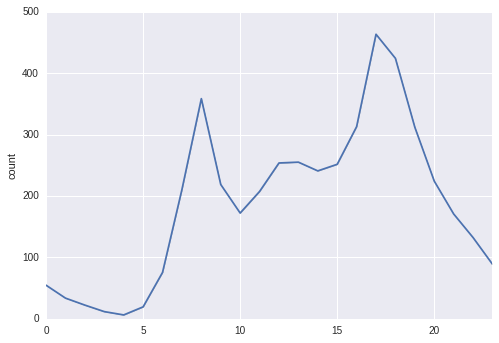

In [7]:
train_by_hour = train.groupby( [ "time_hour"] ).mean()["count"]
print train_by_hour.head()

sns.tsplot(data = train_by_hour,value = "count")

date_month
1     91.608838
2    104.026016
3    131.837925
4    179.149758
5    219.511218
Name: count, dtype: float64


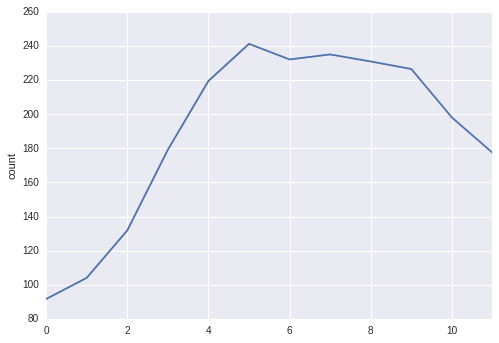

In [8]:
train_by_month = train.groupby( [ "date_month"] ).mean()["count"]
print train_by_month.head()

sns.tsplot(data = train_by_month,
          value = "count")

date_weekday
0    195.357824
1    186.947858
2    185.777355
3    195.071761
4    196.153187
Name: count, dtype: float64


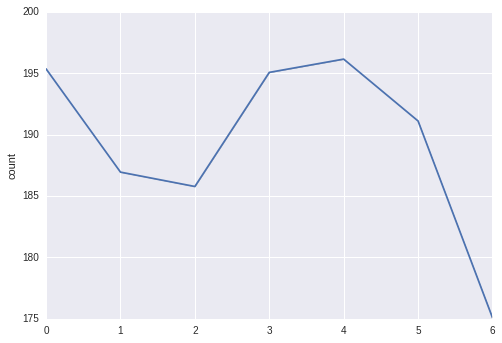

In [9]:
train_by_weekday = train.groupby( [ "date_weekday"] ).mean()["count"]
print train_by_weekday.head()

sns.tsplot(data = train_by_weekday,
          value = "count")

date_day
1    180.333913
2    183.910995
3    194.696335
4    195.705575
5    189.765217
Name: count, dtype: float64


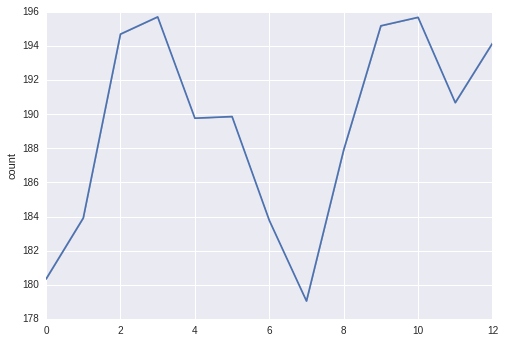

In [10]:
train_by_day = train.groupby( [ "date_day"] ).mean()["count"]
print train_by_day.head()

sns.tsplot(data = train_by_day,
          value = "count")

date_year
2011    141.899865
2012    236.371153
Name: count, dtype: float64


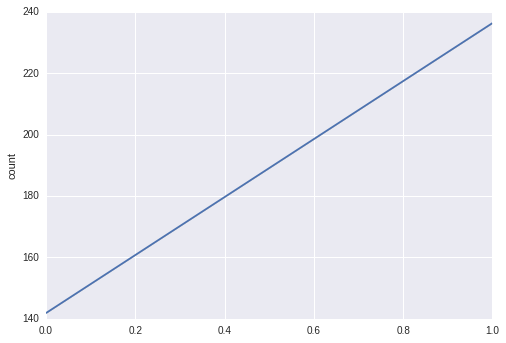

In [11]:
train_by_year = train.groupby( [ "date_year"] ).mean()["count"]
print train_by_year.head()

sns.tsplot(data = train_by_year,
          value = "count")

date_day  date_month  date_year
1         1           2011          985
                      2012         2294
          2           2011         1360
                      2012         4579
          3           2011         1851
Name: count, dtype: int64


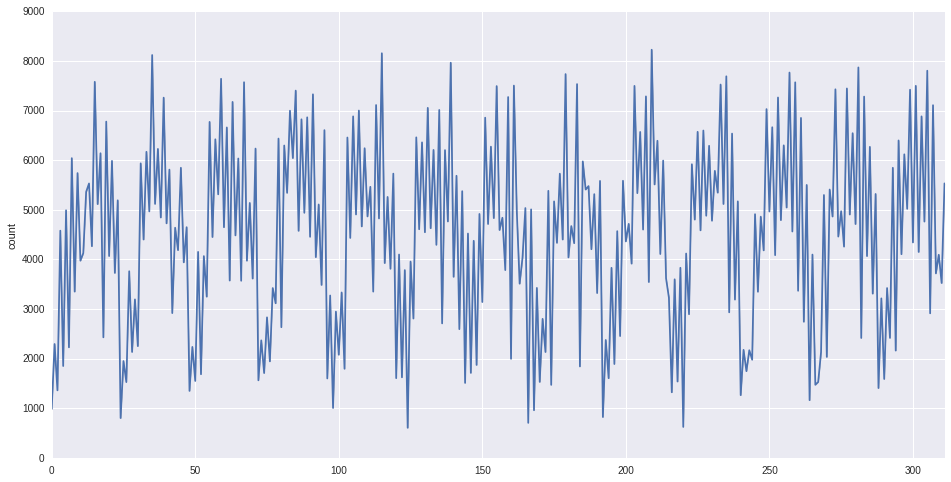

In [60]:
train_timeseries_daily = train.groupby( [ "date_day","date_month", "date_year"] ).sum()["count"]
print train_timeseries_daily.head()

plt.figure(figsize=(16,8))
sns.tsplot(data = train_timeseries_daily,value = "count")

date_month  date_year
1           2011         16346
            2012         39627
2           2011         19964
            2012         44012
3           2011         23341
Name: count, dtype: int64


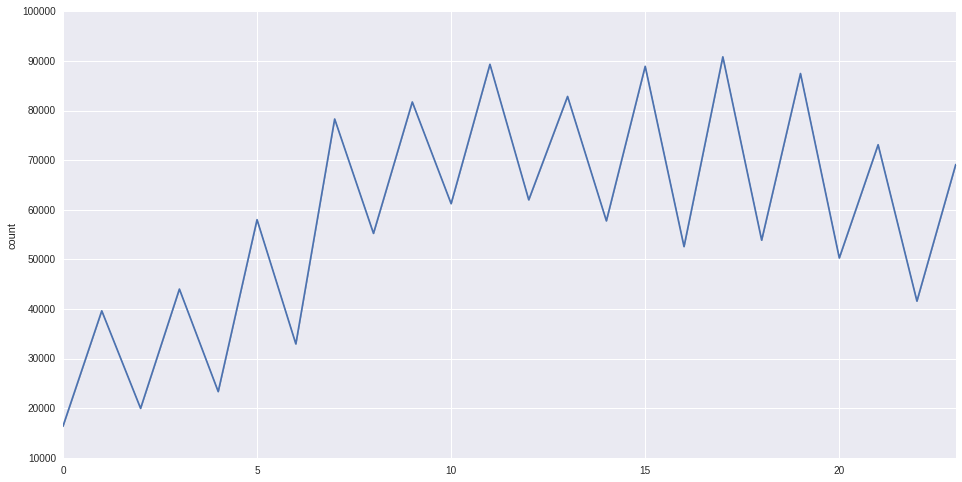

In [61]:
train_timeseries_monthly = train.groupby( [ "date_month", "date_year"] ).sum()["count"]
print train_timeseries_monthly.head()

plt.figure(figsize=(16,8))
sns.tsplot(data = train_timeseries_monthly,value = "count")

In [14]:
train_weather = copy(train)
train_weather = train_weather.groupby( ["weather","temp",
                                        "atemp","humidity","windspeed"],
                                      as_index=False ).mean()
train_weather = train_weather[["weather","temp","atemp","humidity","windspeed","count"]]
print train_weather.head()

   weather  temp  atemp  humidity  windspeed  count
0        1  0.82  0.760        34    19.0012    1.0
1        1  0.82  2.275        41    11.0014   59.0
2        1  0.82  2.275        41    12.9980    8.0
3        1  0.82  2.275        44    12.9980  152.0
4        1  0.82  3.030        44     8.9981  315.0


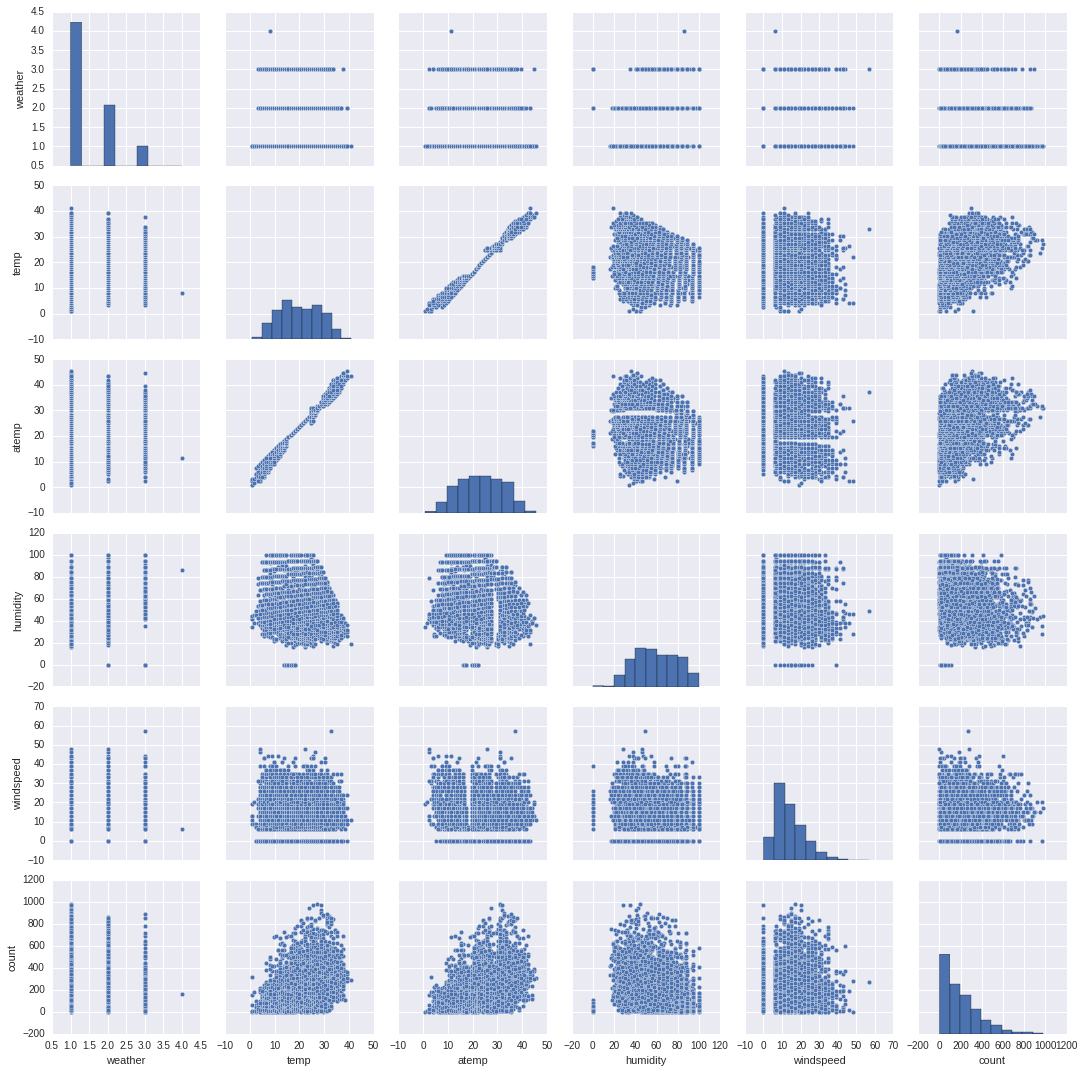

In [15]:
sns.pairplot(train_weather)

In [62]:
X,Y = preprocess_weekdays(train)
rf = RF(n_estimators=1000)
rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

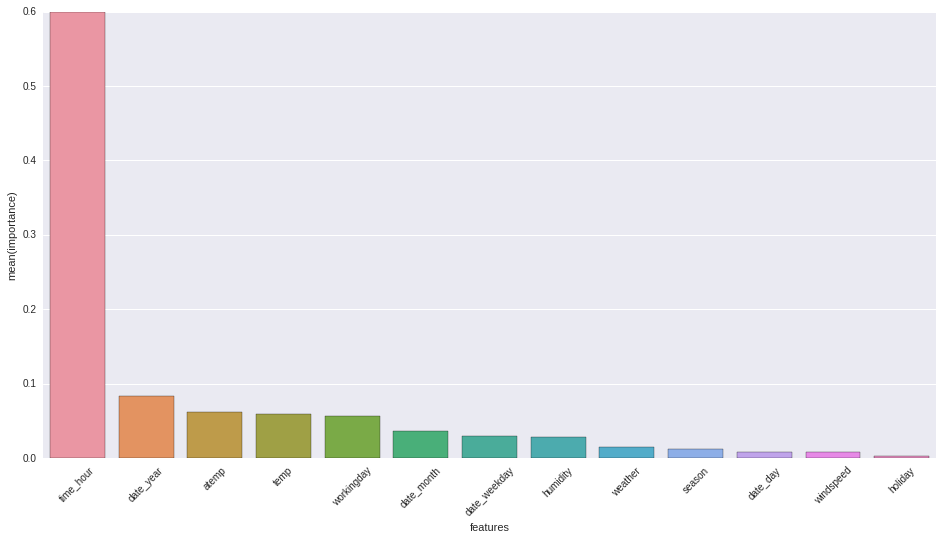

In [63]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
importances = pd.DataFrame(dict(features = X.columns.values,
                                importance =rf.feature_importances_)) 
importances = importances.sort_values(["importance"],ascending=False)
sns.barplot(x="features", y="importance",data=importances)

In [31]:
train_lag = pd.read_csv(os.path.join(data_folder,"train.csv"))
X_train_lag,Y_train_lag = preprocess_weekdays(train_lag,mode="train")
max_lag = 5
X_train_lag = generate_timelag_data(X_train_lag,lag=max_lag)
print X_train_lag.head()

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   time_hour  date_weekday       ...         weather_lag_3  temp_lag_3  \
0          0             5       ...                   1.0        9.84   
1          1             5       ...                   1.0        9.84   
2          2             5       ...                   1.0        9.84   
3          3             5       ...                   1.0        9.84   
4          4             5       ...                   1.0        9.02   

   atemp_lag_3  humidity_lag_3  windspeed_lag_3  weather_lag_4  temp_lag_4  \
0       

In [28]:
rf = RF(n_estimators=100)
rf.fit(X_train_lag,Y_train_lag)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

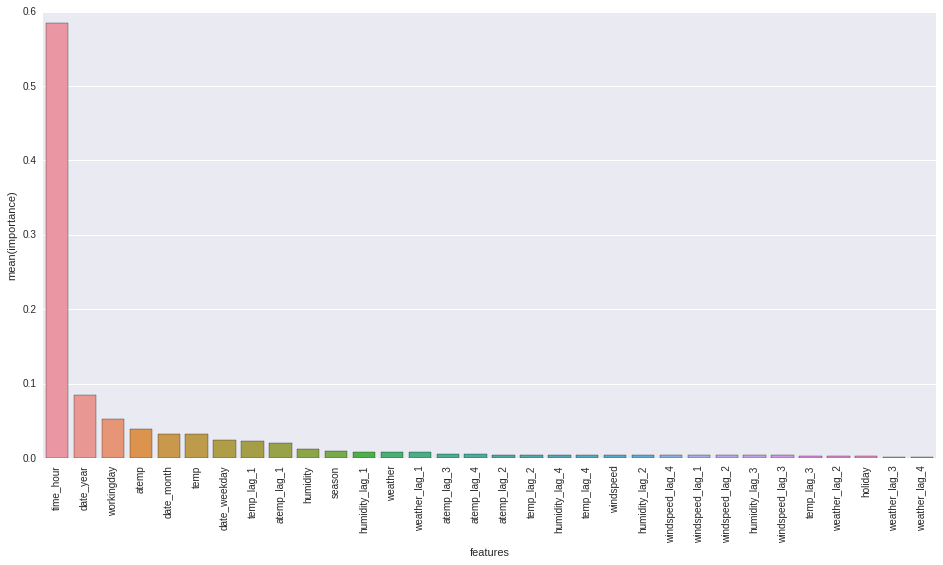

In [29]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
importances = pd.DataFrame(dict(features = X_train_lag.columns.values,
                                importance =rf.feature_importances_)) 
importances = importances.sort_values(["importance"],ascending=False)
sns.barplot(x="features", y="importance",data=importances)

In [32]:
print importances["features"].values

['time_hour' 'date_year' 'workingday' 'atemp' 'date_month' 'temp'
 'date_weekday' 'temp_lag_1' 'atemp_lag_1' 'humidity' 'season'
 'humidity_lag_1' 'weather' 'weather_lag_1' 'atemp_lag_3' 'atemp_lag_4'
 'atemp_lag_2' 'temp_lag_2' 'humidity_lag_4' 'temp_lag_4' 'windspeed'
 'humidity_lag_2' 'windspeed_lag_4' 'windspeed_lag_1' 'windspeed_lag_2'
 'humidity_lag_3' 'windspeed_lag_3' 'temp_lag_3' 'weather_lag_2' 'holiday'
 'weather_lag_3' 'weather_lag_4']


In [56]:
train["pseudo_datetime"] = range(train.shape[0])
train["pseudo_datetime"] =  pd.to_datetime(train["pseudo_datetime"])
train = train.set_index("pseudo_datetime",drop=False)
print train.head()

                                         datetime  season  holiday  \
pseudo_datetime                                                      
1970-01-01 00:00:00.000000000 2011-01-01 00:00:00       1        0   
1970-01-01 00:00:00.000000001 2011-01-01 01:00:00       1        0   
1970-01-01 00:00:00.000000002 2011-01-01 02:00:00       1        0   
1970-01-01 00:00:00.000000003 2011-01-01 03:00:00       1        0   
1970-01-01 00:00:00.000000004 2011-01-01 04:00:00       1        0   

                               workingday  weather  temp   atemp  humidity  \
pseudo_datetime                                                              
1970-01-01 00:00:00.000000000           0        1  9.84  14.395        81   
1970-01-01 00:00:00.000000001           0        1  9.02  13.635        80   
1970-01-01 00:00:00.000000002           0        1  9.02  13.635        80   
1970-01-01 00:00:00.000000003           0        1  9.84  14.395        75   
1970-01-01 00:00:00.000000004           0

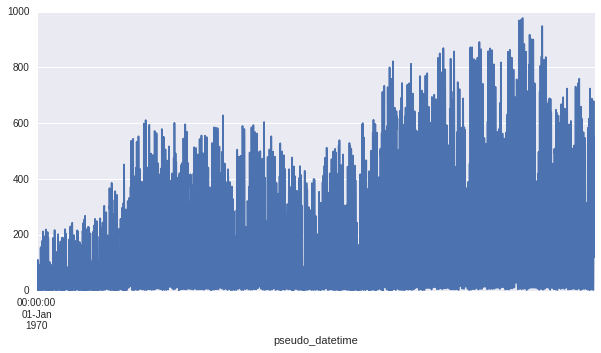

In [57]:
train_series = train
train_series['count'].plot(figsize=(10, 5))  

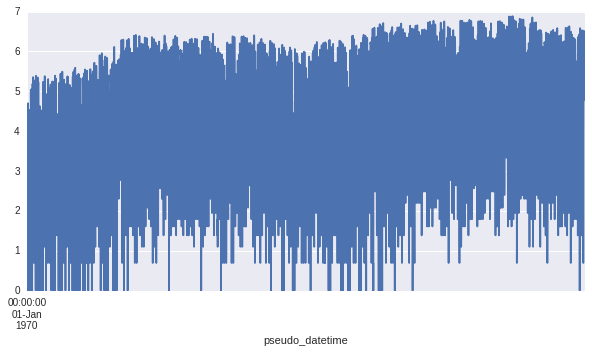

In [58]:
train_series['count_log'] = train_series['count'].apply(lambda x: np.log(x))
train_series['count_log'].plot(figsize=(10, 5))  

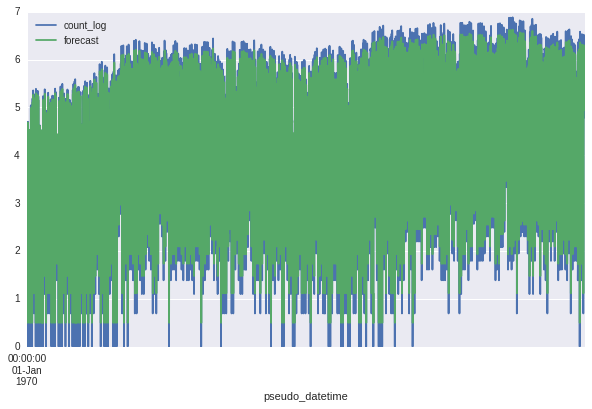

In [61]:
arima_model = sm.tsa.ARIMA(train_series['count_log'].iloc[1:], order=(1, 0, 0))  
results = arima_model.fit(disp=-10)  
train_series['forecast'] = results.fittedvalues  
train_series[['count_log', 'forecast']].plot(figsize=(10, 6))

In [ ]:
arima_model.predict()